In [1]:
import seqdata as sd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
def plot_tracks(tracks, interval, height=1.5, colors=None):
  _, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
  if not isinstance(axes, np.ndarray):
    axes = [axes]
  for ax, (title, y) in zip(axes, tracks.items()):
    if colors is not None:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y, color=colors[title])
    else:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y)
    ax.set_title(title)
    sns.despine(top=True, right=True, bottom=True)
  ax.set_xlabel(f"{interval['chrom']}:{interval['start']}-{interval['end']}")
  plt.tight_layout()

# Pooch

In [3]:
bowwow = sd.datasets.datasets()
bowwow.registry

{'K562_ATAC-seq.zarr.tar.gz': 'sha256:da601746f933a623fc0465c172f0338425690d480ae4aa7c6d645f02d32a7504',
 'signal.bw': 'sha256:df4b2af6ad7612207dcb4f6acce41e8f731b08d2d84c00263f280325c9be8f53',
 'K562_CTCF-ChIP-seq.zarr.tar.gz': 'sha256:c0098fce7464459e88c8b1ef30cad84c1931b818273c07f80005eeb9037e8276',
 'plus.bw': 'sha256:005ba907136c477754c287113b3479a68121c47368455fef9f19f593e2623462',
 'minus.bw': 'sha256:2ff74b44bea80b1c854a265a1f759a3e1aa7baec10ba20139e39d78d7ea5e1ed',
 'cisBP_human.meme': 'sha256:<new_sha256_hash_for_cisBP_human.meme>',
 'Meuleman_2020.meme': 'sha256:<new_sha256_hash_for_Meuleman_2020.meme>',
 'gencode_v41_GRCh38.fa.gz': 'sha256:<new_sha256_hash_for_gencode_v41_GRCh38.fa.gz>'}

# K562 ATAC-seq

In [5]:
path_bw = sd.datasets.K562_ATAC_seq(type="bigwig")
path_bw

PosixPath('/cellar/users/aklie/.cache/seqdata/signal.bw')

In [6]:
path_sdata = sd.datasets.K562_ATAC_seq(type="seqdata")
path_sdata

PosixPath('/cellar/users/aklie/.cache/seqdata/K562_ATAC-seq.zarr')

In [7]:
sdata = sd.open_zarr(path_sdata)
sdata

<xarray.Dataset>
Dimensions:     (_sequence: 269800, cov_sample: 1, _length: 2370)
Coordinates:
  * cov_sample  (cov_sample) object 'K562_ATAC-seq'
Dimensions without coordinates: _sequence, _length
Data variables:
    blockCount  (_sequence) uint64 dask.array<chunksize=(33725,), meta=np.ndarray>
    chrom       (_sequence) object dask.array<chunksize=(33725,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(33725,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(33725,), meta=np.ndarray>
    cov         (_sequence, cov_sample, _length) float32 dask.array<chunksize=(10000, 1, 2370), meta=np.ndarray>
    itemRgb     (_sequence) object dask.array<chunksize=(33725,), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(33725,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(33725,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(10000, 2370), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(33725,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(33725,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(33725,), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    128
    sequence_dim:  _sequence

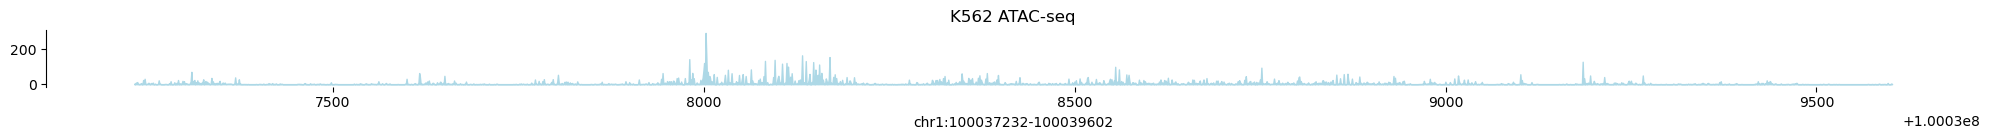

In [20]:
# Get data
seq_num = 10
ser = sdata[["name", "chrom", "chromStart", "chromEnd"]].to_dataframe().loc[seq_num]
sdata_vals = sdata["cov"][seq_num].values.squeeze()
chrom = ser["chrom"]
chromStart = ser["chromStart"]
chromEnd = ser["chromEnd"]
interval = dict(chrom=chrom, start=chromStart, end=chromEnd)
tracks = {"K562 ATAC-seq": sdata_vals}
colors = {"K562 ATAC-seq": "lightblue"}

# Plot tracks
plot_tracks(
    tracks=tracks,
    interval=interval,
    colors=colors
)

# K562 CTCF ChIP-seq

In [3]:
path_bw = sd.datasets.K562_CTCF_ChIP_seq(type="bigwig")
path_bw

(PosixPath('/cellar/users/aklie/.cache/seqdata/plus.bw'),
 PosixPath('/cellar/users/aklie/.cache/seqdata/minus.bw'))

In [8]:
path_sdata = sd.datasets.K562_CTCF_ChIP_seq(type="seqdata")
path_sdata

PosixPath('/cellar/users/aklie/.cache/seqdata/K562_CTCF-ChIP-seq.zarr')

In [9]:
sdata = sd.open_zarr(path_sdata)
sdata

<xarray.Dataset>
Dimensions:     (_sequence: 51759, cov_sample: 2, _length: 2370)
Coordinates:
  * cov_sample  (cov_sample) object 'signal+' 'signal-'
Dimensions without coordinates: _sequence, _length
Data variables:
    blockCount  (_sequence) uint64 dask.array<chunksize=(25880,), meta=np.ndarray>
    chrom       (_sequence) object dask.array<chunksize=(25880,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(25880,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(25880,), meta=np.ndarray>
    cov         (_sequence, cov_sample, _length) float32 dask.array<chunksize=(2048, 1, 2370), meta=np.ndarray>
    itemRgb     (_sequence) object dask.array<chunksize=(25880,), meta=np.ndarray>
    name        (_sequence) object dask.array<chunksize=(25880,), meta=np.ndarray>
    score       (_sequence) float64 dask.array<chunksize=(25880,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(2048, 2370), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(25880,), meta=np.ndarray>
    thickEnd    (_sequence) int64 dask.array<chunksize=(25880,), meta=np.ndarray>
    thickStart  (_sequence) int64 dask.array<chunksize=(25880,), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    128
    sequence_dim:  _sequence

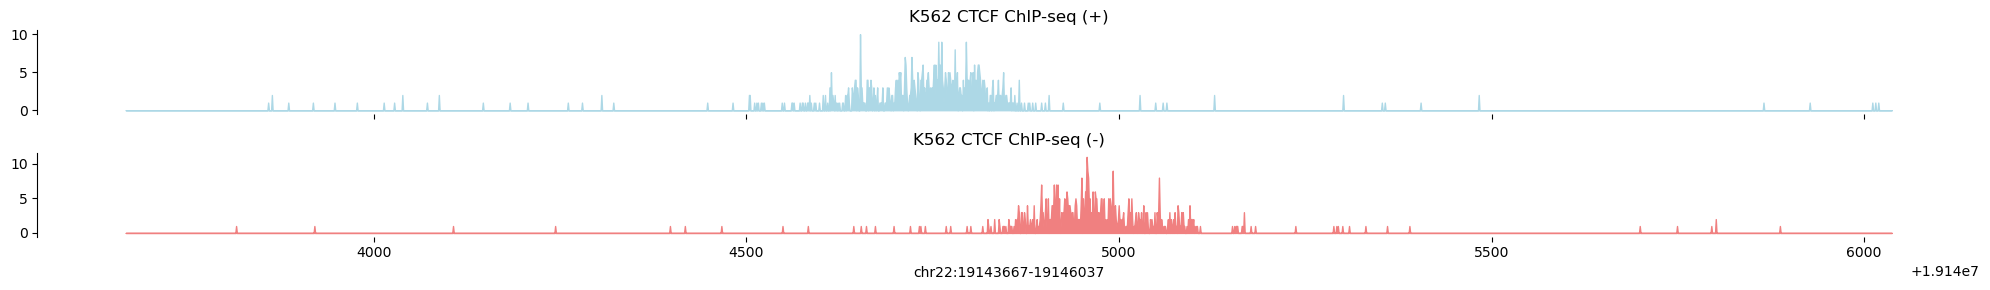

In [11]:
# Get data
seq_num = 10
ser = sdata[["name", "chrom", "chromStart", "chromEnd"]].to_dataframe().loc[seq_num]
sdata_vals = sdata["cov"][seq_num].values
chrom = ser["chrom"]
chromStart = ser["chromStart"]
chromEnd = ser["chromEnd"]
interval = dict(chrom=chrom, start=chromStart, end=chromEnd)
tracks = {
    "K562 CTCF ChIP-seq (+)": np.squeeze(sdata_vals[0]),
    "K562 CTCF ChIP-seq (-)": np.squeeze(sdata_vals[1])
} 
colors={
    "K562 CTCF ChIP-seq (+)": "lightblue",
    "K562 CTCF ChIP-seq (-)": "lightcoral",
}

# Plot tracks
plot_tracks(
    tracks=tracks,
    interval=interval,
    colors=colors
)

# DONE!

---